# **Code Execution Guide (Team 45 Bonus Notebook)**
* *Start with importing this .git repository onto Google Drive or your local system.*
* *Download following files from __MIMIC III Clinical database__*
> 1. NOTEEVENTS.csv
> 1. PROCEDURES ICD.csv
> 1. DIAGNOSES ICD.csv
> 1. CPTEVENTS.csv 

*Place these files into Codes - > MimicIII -> Source*
* *Launch this notebook using Google Colab/Jupyter Notebooks. If using Colab please mount the Google drive using below command so that the notebook now has access to the folder structure.*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* *Start with extracting patient notes from **NOTEEVENTS.csv**.*

In [ ]:
%%shell
cd drive/MyDrive/DLH_Final_Project/test1/Codes
python notes_prep.py

* Create your [UMLS](https://uts.nlm.nih.gov/uts/signup-login?_gl=1*1tk5kri*_ga*ODQ0MDU0MjY1LjE2NDYzNjEyNDE.*_ga_7147EPK006*MTY1MTExNzYwNC4yLjEuMTY1MTExNzYwOC4w*_ga_P1FPTH9PL4*MTY1MTExNzYwNC4yLjEuMTY1MTExNzYwOC4w) account and obtain User Id and key to run cTAKES.
* Follow the instrucions on the [Apache cTAKES](https://cwiki.apache.org/confluence/display/CTAKES/cTAKES+4.0+User+Install+Guide) site to setup the NLP software.



In [ ]:
# Select a batch of n files. Make sure to set the parameter batch_size

#======================batch_parameters======================================
batch_path="/content/drive/MyDrive/DLH_Final_Project/test2/Codes/MimicIII/batch"
batch_size=1000
#======================batch_parameters======================================

# Look at the total files in Noteevents_txt and the amount produced so far in MIMIC_OUT. It also shows statistics

all_code_path = "/content/drive/MyDrive/DLH_Final_Project/test2/Codes/MimicIII/MIMIC_IN/MIMIC_IN"
produced_cui_path = "/content/drive/MyDrive/DLH_Final_Project/test2/Codes/MimicIII/Patients/Cuis"
bsv_cTAKES_path = "/content/drive/MyDrive/DLH_Final_Project/test2/Codes/MimicIII/Patients/piper5_Cuis"

batch_files=os.listdir(batch_path)
all_code_files = os.listdir(all_code_path)
produced_cui_files=os.listdir(produced_cui_path)
bsv_cTAKES_files = os.listdir(bsv_cTAKES_path)
print("batch_files",len(batch_files),batch_files)
print("all_code_files",len(all_code_files),all_code_files)
print("produced_cui_files",len(produced_cui_files),produced_cui_files)
print("bsv_cTAKES_files",len(bsv_cTAKES_files),bsv_cTAKES_files)

print("There are a total of ",len(all_code_files)," files to convert")
#print("and a total of ",len(produced_cui_files), "converted files from the old")

# Store file names in sets

total_code_files=set([x for x in all_code_files])
produced_cui=set([x[:-4] for x in produced_cui_files])
queued_files=set([x for x in batch_files])
bsv_set = set([x[:-13]+".txt" for x in bsv_cTAKES_path])


#unproduced_cui_files = total_code_files - produced_cui - bsv_set 
unproduced_cui_files = total_code_files - bsv_set 

nunproduced = len(unproduced_cui_files)
print("but",len(bsv_set), "newly converted files")
print("So there are ",nunproduced,"files left")
print()

# Convert set into a list, so it is iterable, and copy some files into batch folder

unproduced_cui_files_list = list(unproduced_cui_files)

for x in range(batch_size):
  print(x,"File",unproduced_cui_files_list[x])
  if unproduced_cui_files_list[x] not in bsv_set:
    all_code_path_x = all_code_path + "/" + unproduced_cui_files_list[x]
    batch_path_x = batch_path + "/" + unproduced_cui_files_list[x]
    #print("New source path",all_code_path_x)
    #print("New target path",batch_path_x)
    shutil.copy(all_code_path_x, batch_path_x)

print("end batch production")

In [ ]:
# Run file to use piper file. Set values for --user username --key userkey, which is the username/key to use cTAKES

!bash /content/drive/MyDrive/DLH_Final_Project/apache-ctakes-4.0.0.1/bin/runPiperFile.sh  -p /content/drive/MyDrive/DLH_Final_Project/apache-ctakes-4.0.0.1/colab_ctakespipe5.piper --user username --key userkey


* *Creating a corpus of CUIs fom the cTAKES output extracted.*

In [ ]:
%%shell
cd drive/MyDrive/DLH_Final_Project/test1/Codes
python corpus_gen.py

* *Create the path Codes -> Model and execute below code to Train and save the needed files*.

In [ ]:
%%shell
cd drive/MyDrive/DLH_Final_Project/test1/Codes
python ft.py cuis.cfg

# **Below sections detail the code execution flow for I2b2 Comorbidity**
* *This section is used for evaluation of our learned model and comparison to base models.*
* *Download the i2b2 Obesity Challenge datasets currenty housed [here]("https://portal.dbmi.hms.harvard.edu/")*. You will need the following files.
> 1. obesity_patient_records_training.xml
> 1. obesity_patient_records_training2.xml
> 1. obesity_patient_records_test.xml
> 1. obesity_standoff_annotations_training1.xml
> 1. obesity_standoff_annotations_training2.xml
> 1. obesity_standoff_annotations_test.xml

* *Extract patient notes from the i2b2 datasets.*

In [ ]:
%%shell
cd drive/MyDrive/DLH_Final_Project/test1/Comorbidity
python comorbidity_prep.py

* *Run the cTAKES default pipeline to extract CUIs on the .txt files from previous step.* 

In [ ]:
#Run the below commands individully*
#!bash /content/drive/MyDrive/DLH_Final_Project/apache-ctakes-4.0.0.1/bin/runClinicalPipeline.sh -i /content/drive/MyDrive/DLH_Final_Project/test1/Comorbidity/Train_BATCH_IN --xmiOut /content/drive/MyDrive/DLH_Final_Project/test1/Comorbidity/Train_BATCH_OUT --user <user_id> --key <key>
#!bash /content/drive/MyDrive/DLH_Final_Project/apache-ctakes-4.0.0.1/bin/runClinicalPipeline.sh -i /content/drive/MyDrive/DLH_Final_Project/test1/Comorbidity/Test_records_txt --xmiOut /content/drive/MyDrive/DLH_Final_Project/test1/Comorbidity/Test_BATCH_OUT --user <user_id> --key <key>

* *Extract CUIs from the .xmi Files Received from cTAKES pipleine output*.

In [ ]:
%%shell
cd drive/MyDrive/DLH_Final_Project/test1/Comorbidity
python comorbidityfilegen.py

* *Build baseline sparse model by running svm.py with sparse model configurations*.

In [ ]:
%%shell
cd drive/MyDrive/DLH_Final_Project/test1/Comorbidity
python svm.py sparse.cfg

* *Build baseline svd model by running svm.py with svd model configurations*

In [ ]:
%%shell
cd drive/MyDrive/DLH_Final_Project/test1/Comorbidity
python svm.py svd.cfg

* *Build the dense model by runningRunning svm.py with dense model configurations*

In [ ]:
%%shell
cd drive/MyDrive/DLH_Final_Project/test1/Comorbidity
python svm.py dense.cfg

# **Reproducibility Summary** 
This is an extract from our final report.
>  *The larger implications of the experimental results
of the paper are that there is an attractive alternative
way to phenotype patients, in the paper’s learned
dense patient representation model. However, we
could not reproduce the results in the paper and we believe this may be our use of a subset of the data.
The best judgment seems to be that our paper
fails to support the claims of the paper, but they
don’t invalidate them. We didn’t have time to run
a complete experiment with the full data set. Our
ablations seem to offer marginal improvements to
the model, but still fall short of reproducing the
results or supporting their claims. It could be our
inability to utilize the full data set, which is tied to
the issues we had processing the data.*

# **Visualization Statistics**
*To try and justify our above summary we have tried to summarize our findings and depict them visually against the results of the original paper. In this section our aim is to compare our results with that of the author's. We start by sourcing our dense model results and building a dataframe.*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Importing learned dense model results
df = pd.read_csv('drive/MyDrive/DLH_Final_Project/test1/Comorbidity/Model/dataframe_dense.txt', sep=" ")

x = list(df.columns)
# original paper dense model values are hard coded.
p_orig = [0.91,0.596,0.558,0.781,0.907,0.528,0.645,0.928,0.865,0.825,0.604,0.511,0.611,0.872,0.568,0.638]
r_orig = [0.92,0.596,0.564,0.773,0.919,0.539,0.663,0.91,0.868,0.879,0.65,0.508,0.618,0.873,0.599,0.717]
f1_orig= [0.915,0.596,0.561,0.777,0.913,0.533,0.653,0.919,0.866,0.847,0.621,0.51,0.615,0.872,0.582,0.665]

# Extracting our p,r,f1 values from the imported data frame.
p = df.loc[0, :].values.flatten().tolist()
r = df.loc[1, :].values.flatten().tolist()
f1 = df.loc[2, :].values.flatten().tolist()

*Next, we compare each of the metrics precision, recall and f1 against the author's values.*

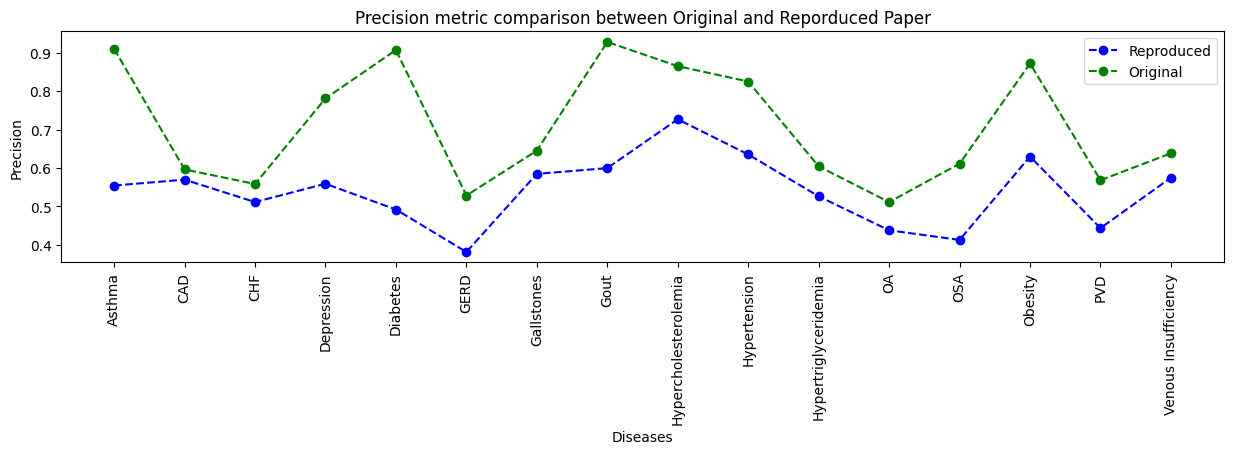

In [ ]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(3)

plt.plot(x, p,linestyle='--', marker='o', color='b', label='Reproduced')
plt.plot(x, p_orig,linestyle='--', marker='o', color='g', label='Original')
plt.title('Precision metric comparison between Original and Reporduced Paper')
plt.xlabel('Diseases')
plt.ylabel('Precision')
plt.xticks(rotation=90)
plt.legend()
plt.show()


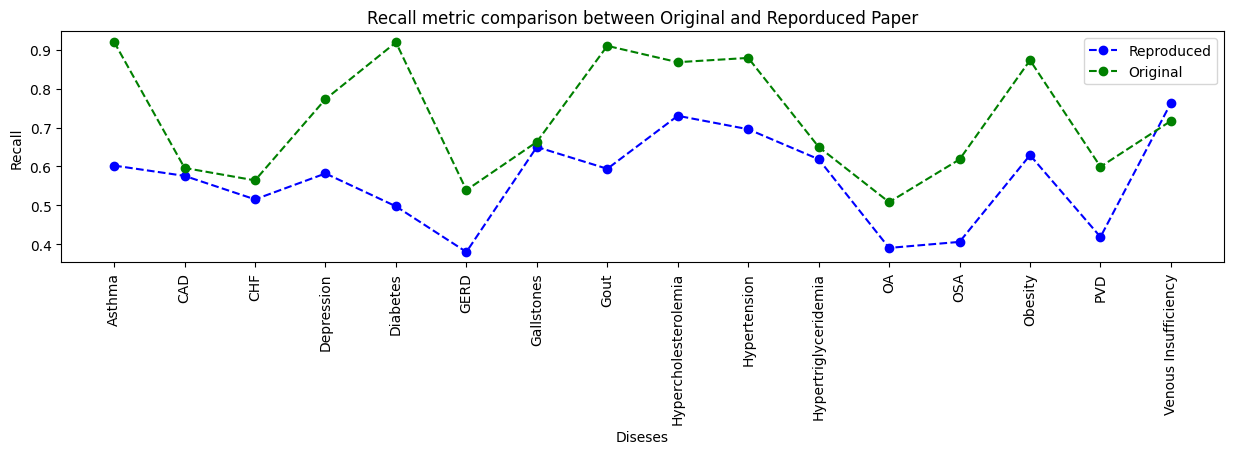

In [ ]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(3)

plt.plot(x, r,linestyle='--', marker='o', color='b', label='Reproduced')
plt.plot(x, r_orig,linestyle='--', marker='o', color='g', label='Original')
plt.title('Recall metric comparison between Original and Reporduced Paper')
plt.xlabel('Diseses')
plt.ylabel('Recall')
plt.xticks(rotation=90)
plt.legend()
plt.show()

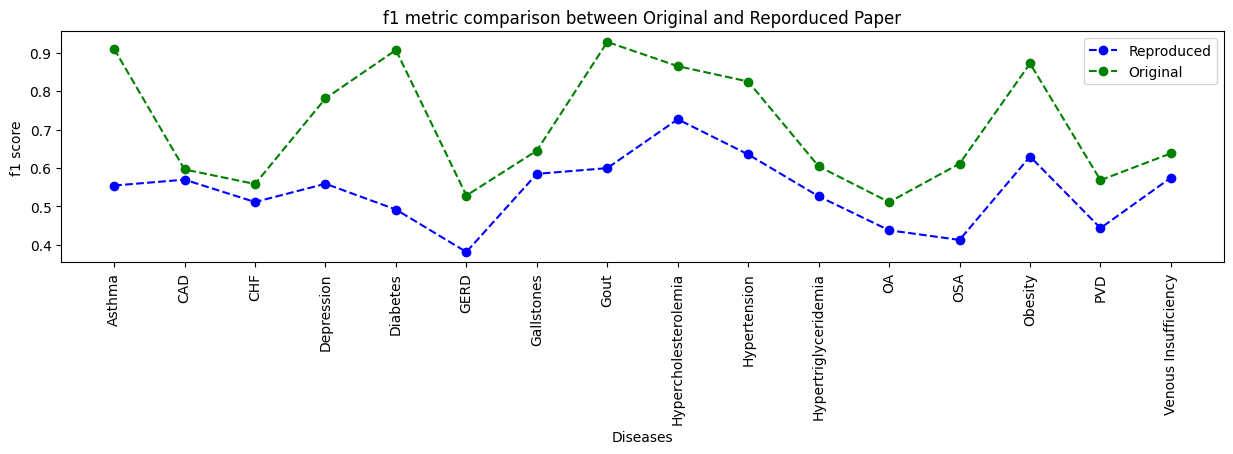

In [ ]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(3)

plt.plot(x, p,linestyle='--', marker='o', color='b', label='Reproduced')
plt.plot(x, p_orig,linestyle='--', marker='o', color='g', label='Original')
plt.title('f1 metric comparison between Original and Reporduced Paper')
plt.xlabel('Diseases')
plt.ylabel('f1 score')
plt.xticks(rotation=90)
plt.legend()
plt.show()

*Each of the trends produced above show strikingly simlar patterns to the original paper's values. This validates our statement that our learned model is in synch with the author's learned model, next, we check reasons why we have lesser accuracy.*

# **Methodology explanation and examples**
This section has been covered in detail in the begining of the notebook.

# **Illustration of the results**

In [ ]:
# Reproduced dense model results
df['Average'] = df.mean(numeric_only=True, axis=1)
df

,Asthma,CAD,CHF,Depression,Diabetes,GERD,Gallstones,Gout,Hypercholesterolemia,Hypertension,Hypertriglyceridemia,OA,OSA,Obesity,PVD,Venous Insufficiency,Average
0,0.554133,0.569367,0.511073,0.558697,0.491614,0.381031,0.584475,0.599461,0.726657,0.635012,0.525917,0.437520,0.412429,0.629662,0.443195,0.574499,0.539671
1,0.602084,0.575629,0.515142,0.581797,0.497299,0.379874,0.649985,0.593786,0.730126,0.695562,0.618395,0.390305,0.405826,0.628952,0.418469,0.763039,0.565392
2,0.532893,0.571870,0.510674,0.547681,0.493915,0.380238,0.562229,0.596449,0.725294,0.638866,0.472427,0.398923,0.408953,0.629255,0.427815,0.546952,0.527777


In [ ]:
#Calculating the percentage difference between our results and the original
rep_avg = df['Average'].to_list()
orig_avg = [np.mean(p_orig),np.mean(r_orig),np.mean(f1_orig)]
dict = {'Original Average':orig_avg,'Reproduced Average': rep_avg}
df_avg = pd.DataFrame(dict, columns = ['Original Average','Reproduced Average'])
df_avg['Relative Tolerance %'] = (df_avg['Original Average'] - df_avg['Reproduced Average']) / df_avg['Original Average']* 100
df_avg

,Original Average,Reproduced Average,Relative Tolerance %
0,0.709187,0.539671,23.902851
1,0.724750,0.565392,21.988007
2,0.715313,0.527777,26.217279


* *__Taking a live count__ of the number of patient notes with CUIs that we managed to extract and how many were there in total.This value may slightly defer from that published in the final report and this is because we continued to generate more files while working on the report in parallel.* 

In [ ]:
%%shell
cd drive/MyDrive/DLH_Final_Project/test1/Data/Patients/Cuis
ls | wc  -l

15646


In [ ]:
%%shell
cd drive/MyDrive/DLH_Final_Project/test1/Codes/MimicIII/MIMIC_IN
ls | wc  -l

46121


In [ ]:
(15646/46121)*100

33.923809110817196

We have a difference of **24% on precision, 22% on recall and 26% on the f1 scores** against the original paper's metrics and also we are currently working off just **34%** of the actual data. We conculde that our results are within the same trends showed by the author's results and our learned model has lowered accuracy due to information loss.

**References**
- https://datatofish.com/line-chart-python-matplotlib/
- https://www.statology.org/pandas-row-to-list/
- https://stackoverflow.com/questions/42100058/percentage-difference-between-any-two-columns-of-pandas-dataframe